In [8]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

arr_out = []
arr_result = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

model=load_model(r'C:\Users\asus\Downloads\vit\ocr.h5')


In [9]:
def test(a,b,c,d,imd):                # to predict the character present in the region of interest
    test=imd[b:b+d,a:a+c]
    _,test_image = cv2.threshold(test,100,255,cv2.THRESH_BINARY)
    test_image= cv2.copyMakeBorder(test_image,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    test_image = cv2.medianBlur(test_image.copy(),3)
    test_image = cv2.resize(test_image.copy(),(64,64),interpolation = cv2.INTER_AREA)
    t = test_image.copy()
    cv2.resize(test_image,(64,64))
    test_image=(img_to_array(test_image))/255
    test_image=np.expand_dims(test_image, axis = 0)
    result=model.predict(test_image)  
    np.reshape(result, 36)
    high = np.amax(test_image)
    low = np.amin(test_image)
    if high != low:
        maxval = np.amax(result)
        index = np.where(result == maxval)
        arr_out.append(arr_result[index[1][0]])

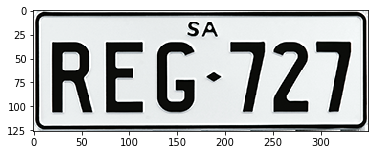

In [10]:
import matplotlib.pyplot as plt
image=cv2.imread(r'C:\Users\asus\Desktop\np1.png')
image.shape

plt.imshow(image)

In [11]:
img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur = cv2.bilateralFilter(img.copy(),9,75,75)
_, thresh = cv2.threshold(blur.copy(), 100, 255, cv2.THRESH_BINARY)
contours, h = cv2.findContours(thresh.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

maxar = 0 
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    


In [12]:

maxar = 10000 
minar = 1000
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w*h < maxar and w*h > minar:
        test(x,y,w,h,img)

In [13]:
final = ""
i = 0
for ch in reversed(arr_out):
    i += 1
    final = final+ch

print('\n',final)


 REG7Z7
